In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [28]:
data = pd.merge(customers, transactions, on='CustomerID')

In [29]:
transaction_features = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),num_transactions=('TransactionID', 'nunique')).reset_index()

In [30]:
data = pd.merge(customers, transaction_features, on='CustomerID')

In [31]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
region_encoded = encoder.fit_transform(data[['Region']])

In [32]:
features = np.hstack([
    region_encoded, data[['total_spent', 'num_transactions']].values])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [33]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [34]:
silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.409


In [35]:
db_index = davies_bouldin_score(features_scaled, data['Cluster'])
print(f"Davies-Bouldin Index (DB Index): {db_index:.3f}")


Davies-Bouldin Index (DB Index): 1.034


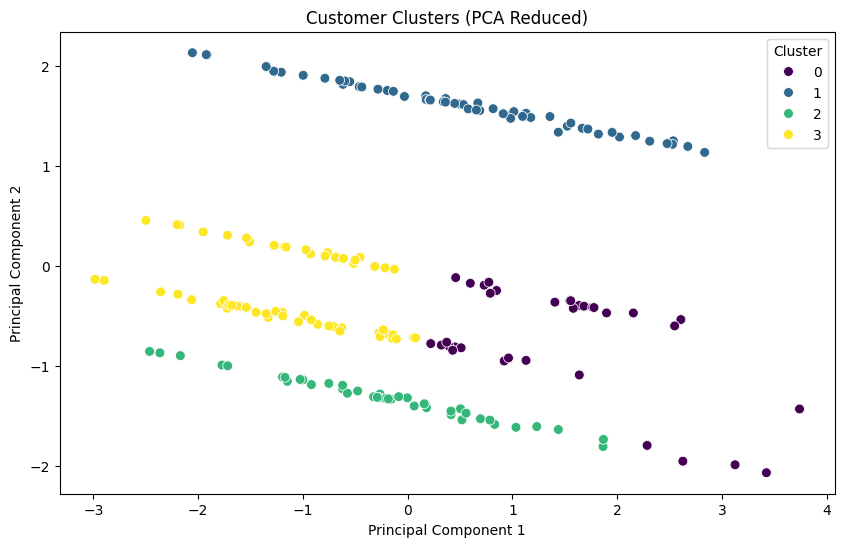

In [36]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='viridis', s=50)
plt.title("Customer Clusters (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

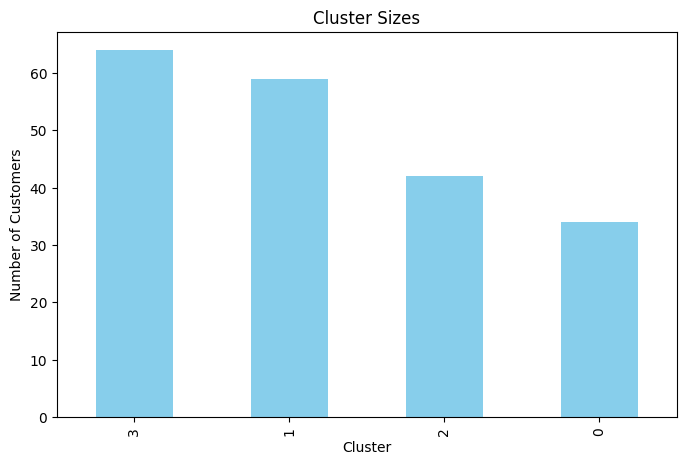

In [37]:
cluster_sizes = data['Cluster'].value_counts()
plt.figure(figsize=(8, 5))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

In [38]:
print(data[['CustomerID', 'Cluster']])
print(f"Number of clusters formed: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

    CustomerID  Cluster
0        C0001        1
1        C0002        3
2        C0003        1
3        C0004        1
4        C0005        3
..         ...      ...
194      C0196        3
195      C0197        3
196      C0198        3
197      C0199        3
198      C0200        0

[199 rows x 2 columns]
Number of clusters formed: 4
Davies-Bouldin Index: 1.034
Silhouette Score: 0.409
